In [9]:
import rlcard
from rlcard.agents import DQNAgent


In [10]:
import os

import torch
import torch.nn.functional as F
from torch import nn, optim
from tf_agents.agents.dqn import dqn_agent


In [11]:
env = rlcard.make("blackjack")
print("Number of actions:", env.num_actions)
print("Number of players:", env.num_players)
print("Shape of state:", env.state_shape)
print("Shape of action:", env.action_shape)

Number of actions: 2
Number of players: 1
Shape of state: [[2]]
Shape of action: [None]


In [12]:
agent = DQNAgent(
    num_actions=env.num_actions,
    state_shape=env.state_shape[0],
    mlp_layers=[64,64],
)

In [13]:
env.set_agents([agent])


In [14]:
from rlcard.utils import (
    tournament,
    reorganize,
    Logger,
    plot_curve,
)

In [15]:
with Logger("experiments/leduc_holdem_dqn_result/") as logger:
    for episode in range(5000):

        # Generate data from the environment
        trajectories, payoffs = env.run(is_training=True)

        # Reorganaize the data to be state, action, reward, next_state, done
        trajectories = reorganize(trajectories, payoffs)

        # Feed transitions into agent memory, and train the agent
        for ts in trajectories[0]:
            agent.feed(ts)

        # Evaluate the performance.
        if episode % 50 == 0:
            logger.log_performance(
                env.timestep,
                tournament(
                    env,
                    10000,
                )[0]
            )

    # Get the paths
    csv_path, fig_path = logger.csv_path, logger.fig_path


----------------------------------------
  episode      |  1
  reward       |  -0.1885
----------------------------------------

----------------------------------------
  episode      |  10939
  reward       |  -0.1596
----------------------------------------
INFO - Step 100, rl-loss: 1.1079227924346924
INFO - Copied model parameters to target network.
INFO - Step 139, rl-loss: 0.6413886547088623
----------------------------------------
  episode      |  21853
  reward       |  -0.1028
----------------------------------------
INFO - Step 208, rl-loss: 0.43630099296569824
----------------------------------------
  episode      |  34525
  reward       |  -0.1855
----------------------------------------
INFO - Step 272, rl-loss: 0.52709394693374636
----------------------------------------
  episode      |  44929
  reward       |  -0.1691
----------------------------------------
INFO - Step 341, rl-loss: 0.47244304418563846
----------------------------------------
  episode      |  55554

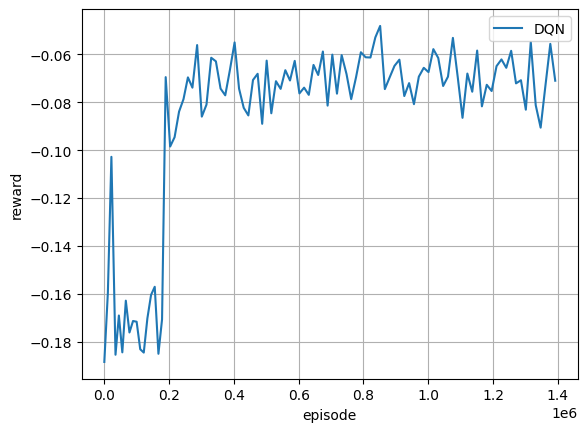

In [16]:
plot_curve(csv_path, fig_path, "DQN")
